In [1]:
 #Checking GPU   
!nvidia-smi      

Wed Sep 17 04:41:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import kagglehub
 
# Download latest version 
path = kagglehub.dataset_download("gavinarmstrong/open-sprayer-images")  
 
print("Path to dataset files:", path)   

Mounting files to /kaggle/input/open-sprayer-images...
Path to dataset files: /kaggle/input/open-sprayer-images


In [4]:
import os  
print("Folders in dataset :",os.listdir('/kaggle/input/open-sprayer-images/Docknet'))        

Folders in dataset : ['valid', 'train']


In [9]:
print("Folders in traning set :",os.listdir('/kaggle/input/open-sprayer-images/Docknet/train')) 
print("Folders in validation set :",os.listdir('/kaggle/input/open-sprayer-images/Docknet/train'))

Folders in traning set : ['docks', 'notdocks']
Folders in validation set : ['docks', 'notdocks']


In [10]:
print("Total images in 'train/docks' folder :",len(os.listdir('/kaggle/input/open-sprayer-images/Docknet/train/docks')))
print("Total images in 'train/notdocks' folder :",len(os.listdir('/kaggle/input/open-sprayer-images/Docknet/train/notdocks')))
print("Total images in 'valid/docks' folder :",len(os.listdir('/kaggle/input/open-sprayer-images/Docknet/valid/docks')))
print("Total images in 'valid/notdocks' folder :",len(os.listdir('/kaggle/input/open-sprayer-images/Docknet/valid/notdocks')))

Total images in 'train/docks' folder : 1176
Total images in 'train/notdocks' folder : 4851
Total images in 'valid/docks' folder : 130
Total images in 'valid/notdocks' folder : 540


In [26]:
# requried libraries
## for image processing 
import cv2
## for operating dataset  
import os 
## for visualizing graphs and images
import matplotlib.pyplot as plt  
## #visualizing for loops 
from tqdm import tqdm  
import glob
## to display images only in colab
from google.colab.patches import cv_imshow
## for working with cnn's
import keras
import numpy as np
## normalization function
from tensorflow.keras.applications.inception_v3 import preprocess_input
## data agumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# defining image size 
img_size = 250 
# pre-processing function 
def preprocess(filename):     
  ## reading images  
  img = cv2.imread(filename)   
  ## converting bgr to rgb color space  
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ## center crop 
  cropped_img = img[int((img.shape[0] - min(img.shape[0], img.shape[1]))/2): int((img.shape[0] + min(img.shape[0], img.shape[1]))/2), int((img.shape[1] - min(img.shape[0], img.shape[1]))/2): int((img.shape[1] + min(img.shape[0], img.shape[1]))/2), :]
  ## image resizing
  img_ = cv2.resize(cropped_img, (img_size,img_size)) 
  ## converting pixel values to floats 
  img_normal = img_.astype("float32")
  ## applying normalization method  
  img_final = preprocess_input(img_normal)  
  ## returning image  
  return img_final

pre-processed image
(250, 250, 3)


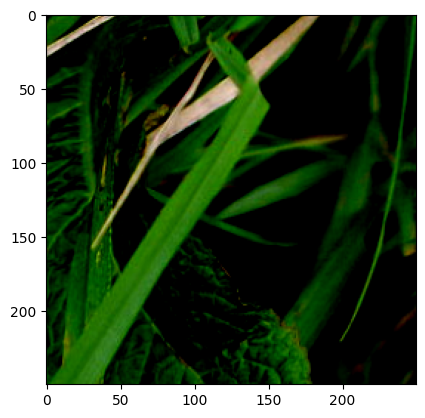

In [18]:
## example of pre processed image
test_preimg = preprocess('/kaggle/input/open-sprayer-images/Docknet/train/docks/10021_11374_8504.jpg')
print("pre-processed image")
print(test_preimg.shape)
plt.imshow(test_preimg)

In [20]:
#train dataset path
train_path = '/kaggle/input/open-sprayer-images/Docknet/train/docks'
#getting all images paths
files = [f for f in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, f))]
#array to store all images after pre-processing
images = []
#array to store all labels
labels = []
#iterating to all files and storing into arrays
for f in tqdm(files):
  img = preprocess(os.path.join(train_path,f))
  images.append(img)
  labels.append(0)

100%|██████████| 1176/1176 [00:07<00:00, 150.01it/s]


In [21]:
print("Total images in train set :",len(images))
print("Total labels in train set :",len(labels))

Total images in train set : 1176
Total labels in train set : 1176


In [23]:
save_dir = "/kaggle/working/aug_images"
os.makedirs(save_dir, exist_ok=True)

In [24]:
#prepapre dataset for traning 

# part 1 : Loading all images in augumented folder 
path = '/kaggle/working/aug_images'    #path for folder
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]     #getting all filenames in folder 
for f in files:
  image = preprocess(os.path.join(path,f))    #applying preprocessing function
  images.append(image)    #storing preprocessed image
  labels.append(0)        #storing corressponding label 

# part 2 : Loading all images in notdocks folder 
path = '/kaggle/input/open-sprayer-images/Docknet/train/notdocks'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
for f in files:
  image = preprocess(os.path.join(path,f))
  images.append(image)
  labels.append(1)

# testing data loading 

test_images = []
test_labels = []

# part 1 : Loading all images in docks folder 

path = '/kaggle/input/open-sprayer-images/Docknet/valid/docks'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
for f in files:
  image = preprocess(os.path.join(path,f))
  test_images.append(image)
  test_labels.append(0)
# part 1 : Loading all images in notdocks folder 
path = '/kaggle/input/open-sprayer-images/Docknet/valid/notdocks' 
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
for f in files:
  image = preprocess(os.path.join(path,f))
  test_images.append(image)
  test_labels.append(1)

In [27]:
# Shuffling traning data

from random import shuffle
#array to save shuffled images
train_images = []
#array to save shuffled labels
train_labels = []
index_shu = np.arange(len(images))
shuffle(index_shu)
for i in index_shu:
  train_images.append(images[i])
  train_labels.append(labels[i])
# printing all shapes to cross check
print(np.array(train_images).shape)
print(np.array(train_labels).shape)
print(np.array(test_images).shape)
print(np.array(test_labels).shape)

(6027, 250, 250, 3)
(6027,)
(670, 250, 250, 3)
(670,)


In [1]:
def model(): 
  model = keras.applications.InceptionV3(include_top=False, input_shape=(250,250,3), weights='imagenet')
  avg_layer = keras.layers.GlobalAveragePooling2D()(model.output)   
  output_layer = keras.layers.Dense(2, activation='softmax')(avg_layer)
  final = keras.engine.training.Model(model.inputs, output_layer) 
  return final   